# Mas'haf Zaman (19i-0585) i190585@nu.edu.pk

# Nile Lazarus (19i-2002) i192002@nu.edu.pk

# Fizzah Ilyas (19i-0412) i190412@nu.edu.pk

# Section E

# Topic: Fake News Detection

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

# Importing CSV Files

In [2]:
#Reading csv files for records of true news articles
trueNews = pd.read_csv(r'C:\Users\fizza\Desktop\True.csv',error_bad_lines=False, engine="python")
#Reading csv files for records of fake news articles
fakeNews = pd.read_csv(r'C:\Users\fizza\Desktop\Fake.csv',error_bad_lines=False, engine="python")

In [3]:
fakeNews

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,GovernmentNews,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,GovernmentNews,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",GovernmentNews,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",GovernmentNews,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,GovernmentNews,"December 25, 2017"
...,...,...,...,...
1408,Fox News Fires One Of Its Longest Running Hos...,The latest in a seemingly unending torrent of ...,PoliticsNews,"May 19, 2017"
1409,Trump’s FCC Will Decimate Internet Freedom (V...,Republicans on the Federal Communications Com...,PoliticsNews,"May 19, 2017"
1410,"Trump Wants Flynn Back, Says Special Counsel ...",In a move that absolutely nobody could have se...,PoliticsNews,"May 18, 2017"
1411,Recused House Russia Investigation Committee ...,"About 163 Trump scandals ago, Rep. Devin Nunes...",PoliticsNews,"May 18, 2017"


In [4]:
trueNews

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Politics,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Politics,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Politics,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Politics,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Politics,"December 29, 2017"
...,...,...,...,...
984,"NY, California governors say residents would s...",NEW YORK (Reuters) - New York and California’s...,GovernmentNews,"October 27, 2017"
985,Rosy White House tax cut forecast clashes with...,WASHINGTON/NEW YORK (Reuters) - The White Hous...,GovernmentNews,"October 27, 2017"
986,Haley says does not want Secretary of State Ti...,KINSHASA (Reuters) - U.S. Ambassador to the Un...,GovernmentNews,"October 27, 2017"
987,President Trump leaning toward Powell as next ...,WASHINGTON (Reuters) - President Donald Trump ...,GovernmentNews,"October 27, 2017"


In [5]:
trueNews.shape

(989, 4)

In [6]:
fakeNews.shape

(1413, 4)

# Data Preprocessing and Cleaning

In [7]:
#adding an additional binary attribute in both datasets for true and fake news (target attribute)
fakeNews['label'] = 'fake'
trueNews['label'] = 'true'

In [8]:
#Joining the two datasets together
dataset = pd.concat([fakeNews, trueNews]).reset_index(drop = True)
dataset.shape

(2402, 5)

In [9]:
#removing unnecessary 'title' attribute from dataset
dataset.drop(["title"],axis=1,inplace=True)
dataset.head()

,text,subject,date,label
0,Donald Trump just couldn t wish all Americans ...,GovernmentNews,"December 31, 2017",fake
1,House Intelligence Committee Chairman Devin Nu...,GovernmentNews,"December 31, 2017",fake
2,"On Friday, it was revealed that former Milwauk...",GovernmentNews,"December 30, 2017",fake
3,"On Christmas day, Donald Trump announced that ...",GovernmentNews,"December 29, 2017",fake
4,Pope Francis used his annual Christmas Day mes...,GovernmentNews,"December 25, 2017",fake


In [10]:
#removing unnecessary 'date' attribute from the dataset
dataset.drop(["date"],axis=1,inplace=True)
dataset.head()

,text,subject,label
0,Donald Trump just couldn t wish all Americans ...,GovernmentNews,fake
1,House Intelligence Committee Chairman Devin Nu...,GovernmentNews,fake
2,"On Friday, it was revealed that former Milwauk...",GovernmentNews,fake
3,"On Christmas day, Donald Trump announced that ...",GovernmentNews,fake
4,Pope Francis used his annual Christmas Day mes...,GovernmentNews,fake


In [11]:
from sklearn.utils import shuffle
#shuffling dataset so true and fake records are mixed together
dataset = shuffle(dataset)
dataset = dataset.reset_index(drop=True)

In [12]:
dataset

,text,subject,label
0,Donald Trump just threw a match on this tinder...,GovernmentNews,fake
1,Donald Trump attacked the CEOs who are leaving...,News,fake
2,"At a rally last year, Donald Trump said there ...",WorldNews,fake
3,"Every once in a while, it seems like Sen. Lind...",News,fake
4,"As is the norm for Donald Trump, it s clear he...",News,fake
...,...,...,...
2397,After two days of controversy over Donald Trum...,GovernmentNews,fake
2398,While Londoners were coming together in a show...,PoliticsNews,fake
2399,TOKYO (Reuters) - U.S. President Donald Trump ...,GovernmentNews,true
2400,WASHINGTON (Reuters) - U.S. Attorney General J...,GovernmentNews,true


In [13]:
textData = dataset['text']

In [14]:
textData

0       Donald Trump just threw a match on this tinder...
1       Donald Trump attacked the CEOs who are leaving...
2       At a rally last year, Donald Trump said there ...
3       Every once in a while, it seems like Sen. Lind...
4       As is the norm for Donald Trump, it s clear he...
                              ...                        
2397    After two days of controversy over Donald Trum...
2398    While Londoners were coming together in a show...
2399    TOKYO (Reuters) - U.S. President Donald Trump ...
2400    WASHINGTON (Reuters) - U.S. Attorney General J...
2401    One of the many reasons Americans were suspici...
Name: text, Length: 2402, dtype: object

In [15]:
#checking for nulls
dataset.isnull().sum()

text       0
subject    0
label      0
dtype: int64

In [16]:
#remove punctation
import string

def remove_punctuation(textData):
    all_list = [char for char in textData if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

dataset['text'] = dataset['text'].apply(remove_punctuation)

In [17]:
dataset.head()

,text,subject,label
0,Donald Trump just threw a match on this tinder...,GovernmentNews,fake
1,Donald Trump attacked the CEOs who are leaving...,News,fake
2,At a rally last year Donald Trump said there w...,WorldNews,fake
3,Every once in a while it seems like Sen Lindse...,News,fake
4,As is the norm for Donald Trump it s clear he ...,News,fake


In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwrds = stopwords.words('english')

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwrds)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fizza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
dataset.head()

,text,subject,label
0,Donald Trump threw match tinder box nation dec...,GovernmentNews,fake
1,Donald Trump attacked CEOs leaving Manufacturi...,News,fake
2,At rally last year Donald Trump said 100 perce...,WorldNews,fake
3,Every seems like Sen Lindsey Graham RSC might ...,News,fake
4,As norm Donald Trump clear absolutely preparat...,News,fake


In [42]:
print(dataset.groupby(['label'])['text'].count())

label
fake    1413
true     989
Name: text, dtype: int64


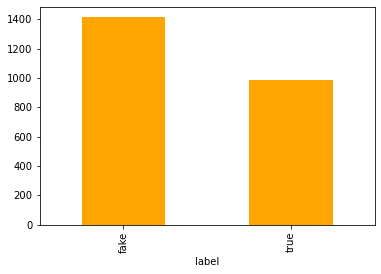

In [46]:
#group records by target label (i.e. true or fake)
dataset.groupby(['label'])['text'].count().plot(kind="bar", color="orange")
plt.show()

subject
GovernmentNews    857
News              590
Politics           76
PoliticsNews      575
WorldNews         304
Name: text, dtype: int64


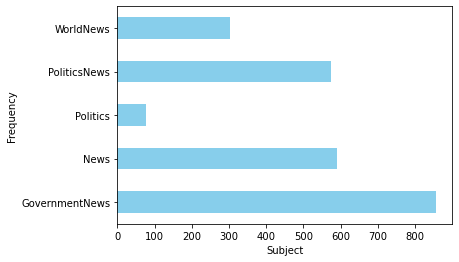

In [57]:
#group records by subject (i.e topic)
print(dataset.groupby(['subject'])['text'].count())
dataset.groupby(['subject'])['text'].count().plot(kind="barh", color= "skyblue")
plt.xlabel("Subject")
plt.ylabel("Frequency")
plt.show()

In [23]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Word Cloud

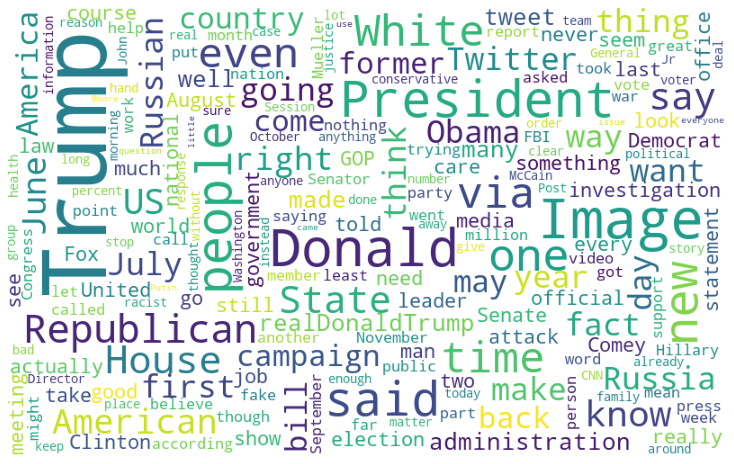

In [24]:
#find frequency of words used in fake news records
from wordcloud import WordCloud

fake_data = dataset[dataset["label"] == "fake"]
all_data = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          background_color ='white',
                          max_font_size = 100,
                          collocations = False).generate(all_data)

plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
#type(fake_data)
plt.show()

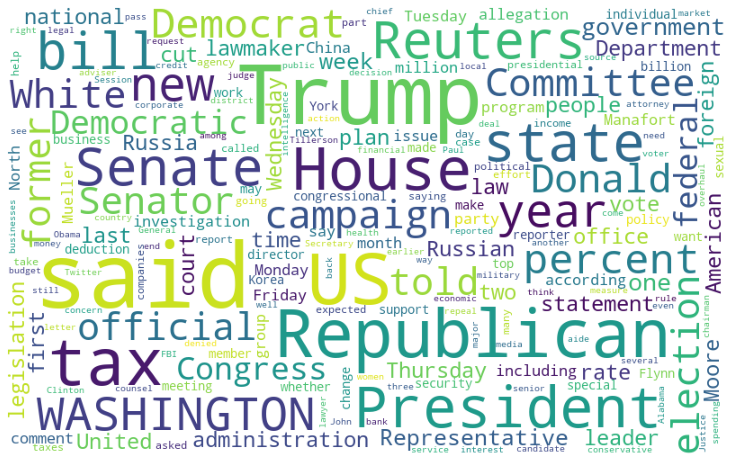

In [25]:
#find frequency of words used in true news records
from wordcloud import WordCloud

true_data = dataset[dataset["label"] == "true"]
all_data = ' '.join([text for text in true_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          background_color ='white',
                          max_font_size = 100,
                          collocations = False).generate(all_data)

plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Word Frequency Graphs

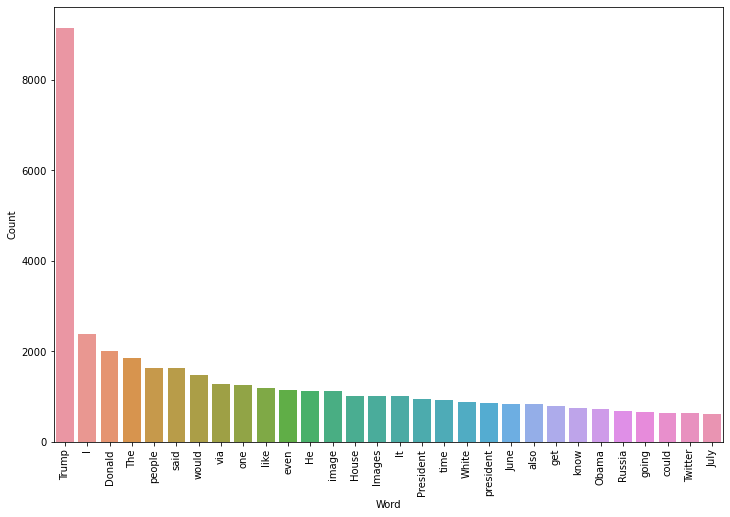

In [156]:
#represent word frequency in readable graphs
from nltk import tokenize

tokens = tokenize.WhitespaceTokenizer()

all_data = ' '.join([text for text in fake_data.text])
tokenPhrase = tokens.tokenize(all_data)
frequency = nltk.FreqDist(tokenPhrase)
df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                               "Frequency": list(frequency.values())})
df_frequency = df_frequency.nlargest(columns = "Frequency", n = 30)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency")
ax.set(ylabel = "Count")
plt.xticks(rotation='vertical')
plt.show()


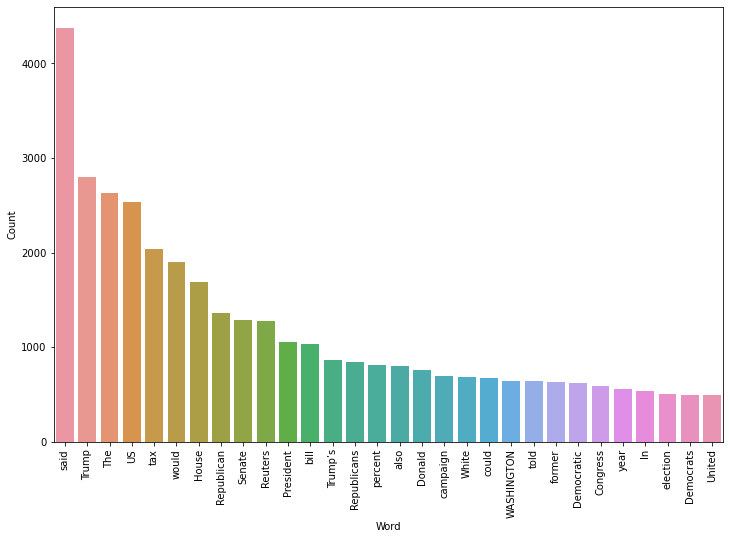

In [157]:
from nltk import tokenize

tokens = tokenize.WhitespaceTokenizer()

all_data = ' '.join([text for text in true_data.text])
tokenPhrase = tokens.tokenize(all_data)
frequency = nltk.FreqDist(tokenPhrase)
df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                               "Frequency": list(frequency.values())})
df_frequency = df_frequency.nlargest(columns = "Frequency", n = 30)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency")
ax.set(ylabel = "Count")
plt.xticks(rotation='vertical')
plt.show()

In [158]:
X_train,X_test,y_train,y_test = train_test_split(dataset['text'], dataset.label, test_size=0.2, random_state=42)

# Classification

# K-Nearest-Neighbor

accuracy: 0.85


Text(0.5, 2.0190296114372046, 'Predicted label')

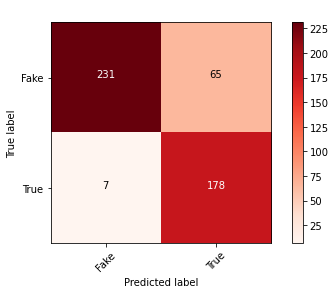

In [159]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

#Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier())])

#Fitting the model
model = pipe.fit(X_train, y_train)

#Calculating accuracy
prediction = model.predict(X_test)
knn_accuracy = format(round(accuracy_score(y_test, prediction),2))
print("accuracy:", knn_accuracy)

#creating confusion matrix to check accuracy of different classification algorightms
plt.imshow(metrics.confusion_matrix(y_test, prediction), interpolation='nearest', cmap=plt.cm.Reds)
plt.title(' ')
plt.colorbar()
tick_marks = np.arange(len(['Fake', 'True']))
plt.xticks(tick_marks, ['Fake', 'True'], rotation=45)
plt.yticks(tick_marks, ['Fake', 'True'])

thresh = metrics.confusion_matrix(y_test, prediction).max() / 2.
for i, j in itertools.product(range(metrics.confusion_matrix(y_test, prediction).shape[0]), range(metrics.confusion_matrix(y_test, prediction).shape[1])):
    plt.text(j, i, metrics.confusion_matrix(y_test, prediction)[i, j],
             horizontalalignment="center",
             color="black" if metrics.confusion_matrix(y_test, prediction)[i, j] < thresh else "white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


# Logistic Regression

accuracy: 0.98


Text(0.5, 2.0190296114372046, 'Predicted label')

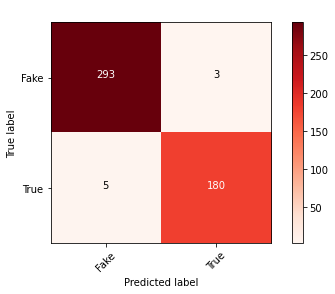

In [160]:
from sklearn import metrics
import itertools

from sklearn.linear_model import LogisticRegression

#Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

#Fitting the model
model = pipe.fit(X_train, y_train)

#Calculating accuracy
prediction = model.predict(X_test)
lr_accuracy = format(round(accuracy_score(y_test, prediction),2))
print("accuracy:", lr_accuracy)

#creating confusion matrix to check accuracy of different classification algorightms
plt.imshow(metrics.confusion_matrix(y_test, prediction), interpolation='nearest', cmap=plt.cm.Reds)
plt.title(' ')
plt.colorbar()
tick_marks = np.arange(len(['Fake', 'True']))
plt.xticks(tick_marks, ['Fake', 'True'], rotation=45)
plt.yticks(tick_marks, ['Fake', 'True'])

thresh = metrics.confusion_matrix(y_test, prediction).max() / 2.
for i, j in itertools.product(range(metrics.confusion_matrix(y_test, prediction).shape[0]), range(metrics.confusion_matrix(y_test, prediction).shape[1])):
    plt.text(j, i, metrics.confusion_matrix(y_test, prediction)[i, j],
             horizontalalignment="center",
             color="black" if metrics.confusion_matrix(y_test, prediction)[i, j] < thresh else "white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Decision Tree

accuracy: 1.0


Text(0.5, 2.0190296114372046, 'Predicted label')

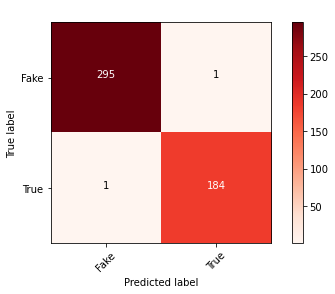

In [161]:
from sklearn.tree import DecisionTreeClassifier

#Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
#Fitting the model
model = pipe.fit(X_train, y_train)

#Calculating accuracy
prediction = model.predict(X_test)
dt_accuracy = format(round(accuracy_score(y_test, prediction),2))
print("accuracy:", dt_accuracy)

#creating confusion matrix to check accuracy of different classification algorightms
plt.imshow(metrics.confusion_matrix(y_test, prediction), interpolation='nearest', cmap=plt.cm.Reds)
plt.title(' ')
plt.colorbar()
tick_marks = np.arange(len(['Fake', 'True']))
plt.xticks(tick_marks, ['Fake', 'True'], rotation=45)
plt.yticks(tick_marks, ['Fake', 'True'])

thresh = metrics.confusion_matrix(y_test, prediction).max() / 2.
for i, j in itertools.product(range(metrics.confusion_matrix(y_test, prediction).shape[0]), range(metrics.confusion_matrix(y_test, prediction).shape[1])):
    plt.text(j, i, metrics.confusion_matrix(y_test, prediction)[i, j],
             horizontalalignment="center",
             color="black" if metrics.confusion_matrix(y_test, prediction)[i, j] < thresh else "white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Naive Bayes

accuracy: 0.97


Text(0.5, 2.0190296114372046, 'Predicted label')

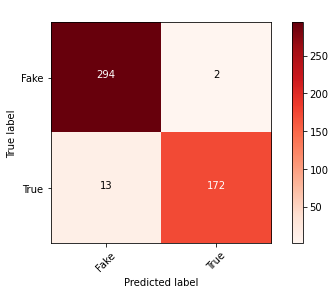

In [162]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()

#Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

#Fitting the model
model = pipe.fit(X_train, y_train)

#Calculating accuracy
prediction = model.predict(X_test)
nb_accuracy = format(round(accuracy_score(y_test, prediction),2))
print("accuracy:", nb_accuracy)

#creating confusion matrix to check accuracy of different classification algorightms
plt.imshow(metrics.confusion_matrix(y_test, prediction), interpolation='nearest', cmap=plt.cm.Reds)
plt.title(' ')
plt.colorbar()
tick_marks = np.arange(len(['Fake', 'True']))
plt.xticks(tick_marks, ['Fake', 'True'], rotation=45)
plt.yticks(tick_marks, ['Fake', 'True'])

thresh = metrics.confusion_matrix(y_test, prediction).max() / 2.
for i, j in itertools.product(range(metrics.confusion_matrix(y_test, prediction).shape[0]), range(metrics.confusion_matrix(y_test, prediction).shape[1])):
    plt.text(j, i, metrics.confusion_matrix(y_test, prediction)[i, j],
             horizontalalignment="center",
             color="black" if metrics.confusion_matrix(y_test, prediction)[i, j] < thresh else "white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Random Forest

accuracy: 1.0


Text(0.5, 2.0190296114372046, 'Predicted label')

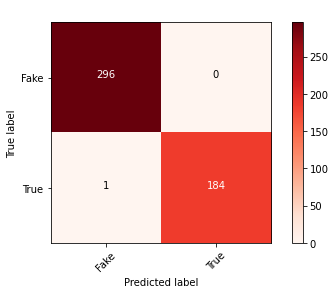

In [163]:
from sklearn.ensemble import RandomForestClassifier

#Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

#Fitting the model
model = pipe.fit(X_train, y_train)

#Calculating accuracy
prediction = model.predict(X_test)
rf_accuracy = format(round(accuracy_score(y_test, prediction),2))
print("accuracy:", rf_accuracy)

#creating confusion matrix to check accuracy of different classification algorightms
plt.imshow(metrics.confusion_matrix(y_test, prediction), interpolation='nearest', cmap=plt.cm.Reds)
plt.title(' ')
plt.colorbar()
tick_marks = np.arange(len(['Fake', 'True']))
plt.xticks(tick_marks, ['Fake', 'True'], rotation=45)
plt.yticks(tick_marks, ['Fake', 'True'])

thresh = metrics.confusion_matrix(y_test, prediction).max() / 2.
for i, j in itertools.product(range(metrics.confusion_matrix(y_test, prediction).shape[0]), range(metrics.confusion_matrix(y_test, prediction).shape[1])):
    plt.text(j, i, metrics.confusion_matrix(y_test, prediction)[i, j],
             horizontalalignment="center",
             color="black" if metrics.confusion_matrix(y_test, prediction)[i, j] < thresh else "white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Comparing Models

In [166]:
models = []
models.append(knn_accuracy)
models.append(lr_accuracy)
models.append(dt_accuracy)
models.append(nb_accuracy)
models.append(rf_accuracy)

In [167]:
models = list(map(float, models))

In [180]:
def valuelabel(classifier,accuracy):
    for i in range(len(classifier)):
        plt.text(i,accuracy[i],accuracy[i], ha = 'center',
                 bbox = dict(facecolor = 'aquamarine', alpha =0.8))

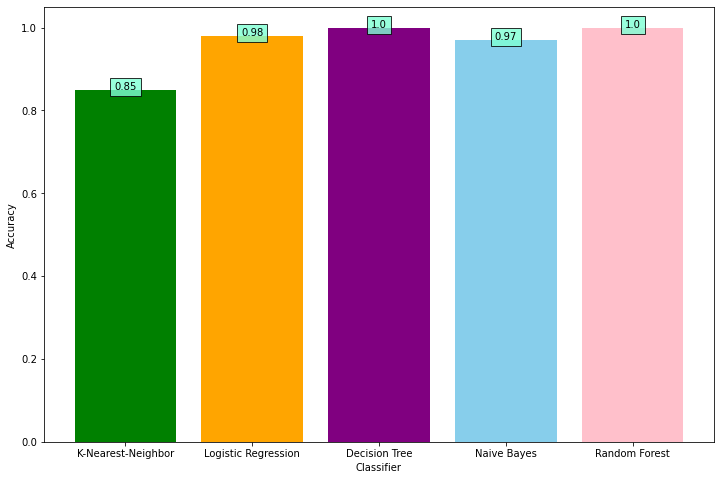

In [183]:
accuracy = models
classifier = ['K-Nearest-Neighbor', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']
plt.figure(figsize=(12,8))
plt.bar(classifier, accuracy, color =['green', 'orange', 'purple', 'skyblue', 'pink'],
        width = 0.8)
valuelabel(classifier, accuracy)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.show()
